<a href="https://colab.research.google.com/github/codes-by-pinewood/IAAM_Practical4/blob/main/IAAM_Practical4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diplib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 34.9 MB/s eta 0:00:00


In [2]:
#import necessary packages
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
from diplib import MeasurementTool as Tool
from diplib import Threshold, Label

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


In [3]:
# # mount to internal image files
# from google.colab import drive
# drive.mount('/content/drive/')
# path = '/content/drive/My Drive/ImageAnalysis/'

In [5]:
# mount to internal image files
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/My Drive/ImageAnalysis/Practical4/'

Mounted at /content/drive/


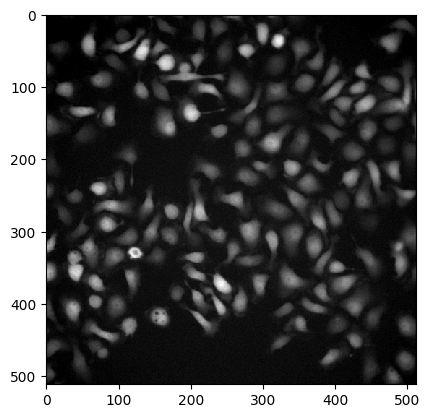

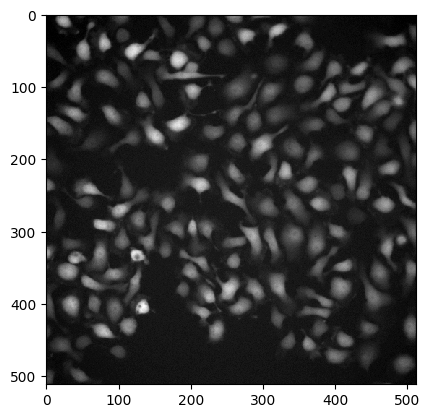

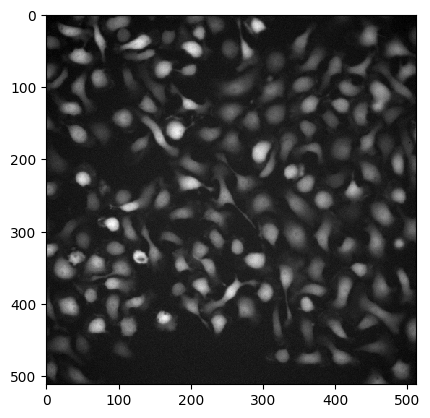

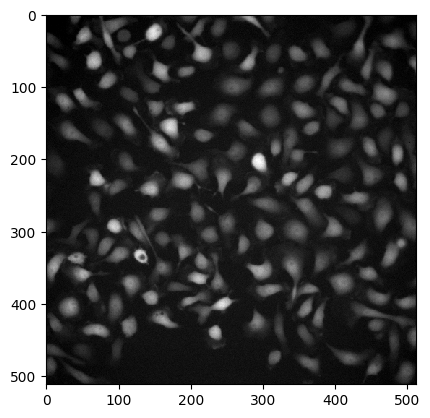

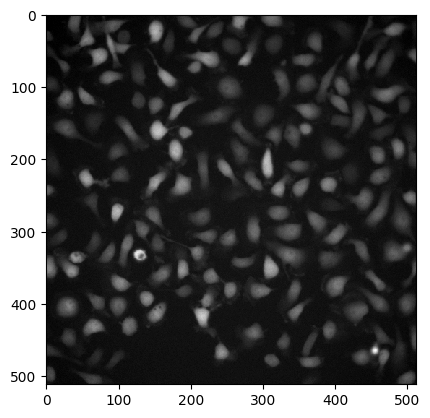

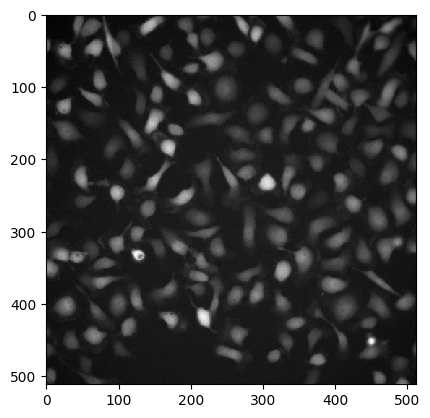

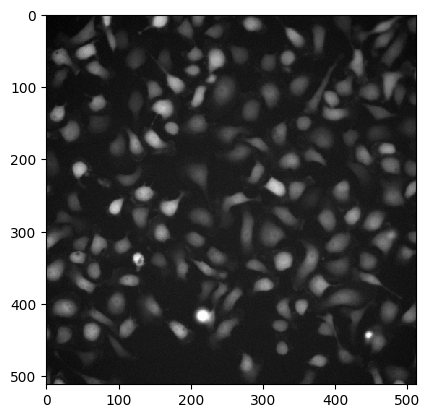

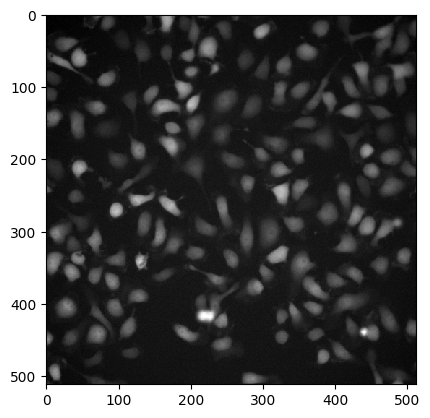

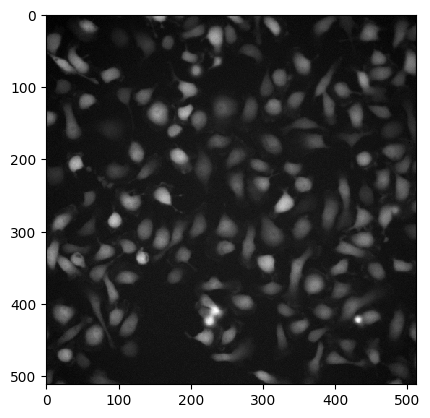

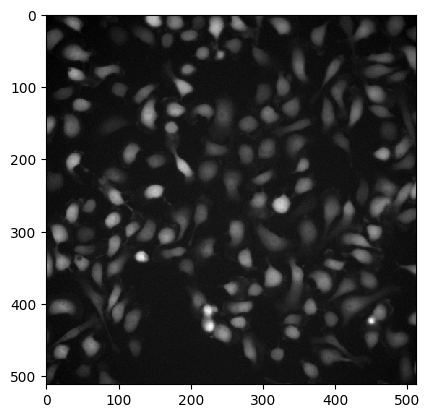

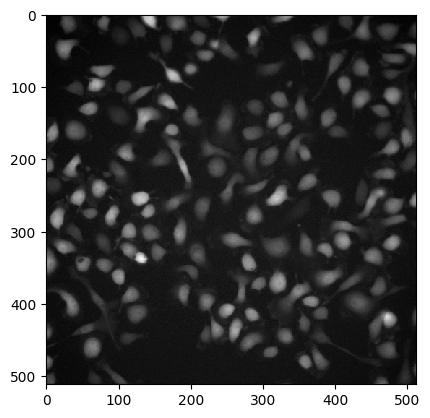

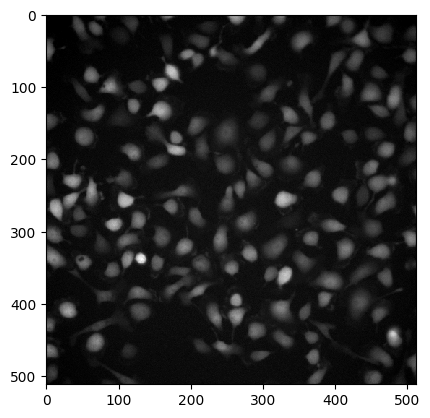

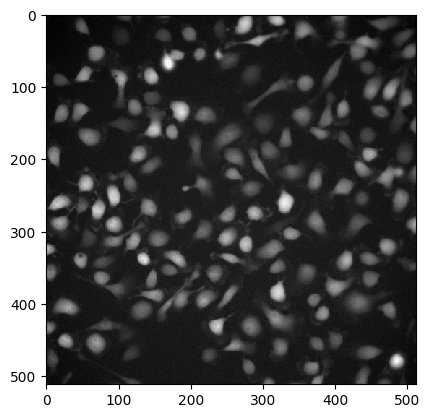

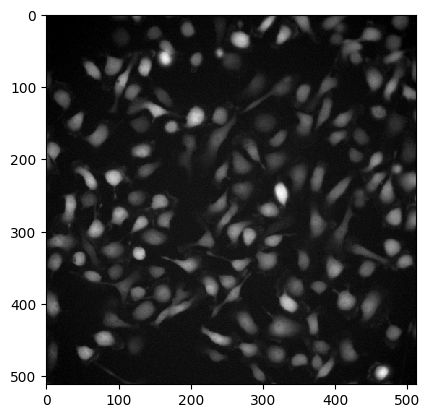

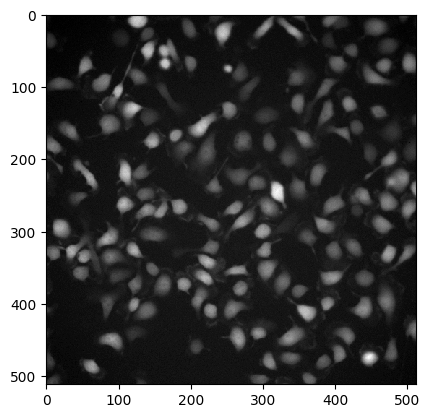

In [6]:
a_1 = dip.ImageReadTIFF(path + "MTLn3+EGF0001.tif")
a_2 = dip.ImageReadTIFF(path + "MTLn3+EGF0002.tif")
a_3 = dip.ImageReadTIFF(path + "MTLn3+EGF0003.tif")
a_4 = dip.ImageReadTIFF(path + "MTLn3+EGF0004.tif")
a_5= dip.ImageReadTIFF(path + "MTLn3+EGF0005.tif")
a_6 = dip.ImageReadTIFF(path + "MTLn3+EGF0006.tif")
a_7 = dip.ImageReadTIFF(path + "MTLn3+EGF0007.tif")
a_8 = dip.ImageReadTIFF(path + "MTLn3+EGF0008.tif")
a_9 = dip.ImageReadTIFF(path + "MTLn3+EGF0009.tif")
a_10 = dip.ImageReadTIFF(path + "MTLn3+EGF0010.tif")
a_11 = dip.ImageReadTIFF(path + "MTLn3+EGF0011.tif")
a_12 = dip.ImageReadTIFF(path + "MTLn3+EGF0012.tif")
a_13 = dip.ImageReadTIFF(path + "MTLn3+EGF0013.tif")
a_14 = dip.ImageReadTIFF(path + "MTLn3+EGF0014.tif")
a_15 = dip.ImageReadTIFF(path + "MTLn3+EGF0015.tif")

a_1.Show()
a_2.Show()
a_3.Show()
a_4.Show()
a_5.Show()
a_6.Show()
a_7.Show()
a_8.Show()
a_9.Show()
a_10.Show()
a_11.Show()
a_12.Show()
a_13.Show()
a_14.Show()
a_15.Show()

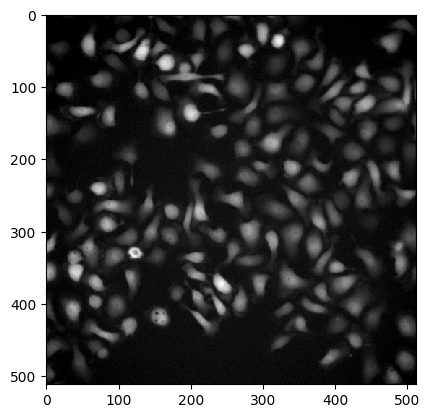

In [8]:
a_1_arr = np.array(a_1)
gray_image = np.mean(a_1_arr, axis=2)
gray_image_dip = dip.Image(gray_image)
gray_image_dip.Show()

In [16]:
# # Set a threshold value (adjust as needed)
# edges_a1 = dip.GradientMagnitude(a_1)
# mask_a1 = dip.Threshold(edges_a1)[0]
# # Create the binary image
# im_bw = dip.Threshold(gray_image_dip, threshold_value)
# im_bw.Show()

RuntimeError: Image is not scalar
in function: dip::dfloat dip::OtsuThreshold(const dip::Image&, const dip::Image&, dip::Image&) (/diplib/src/segmentation/threshold.cpp at line number 57)

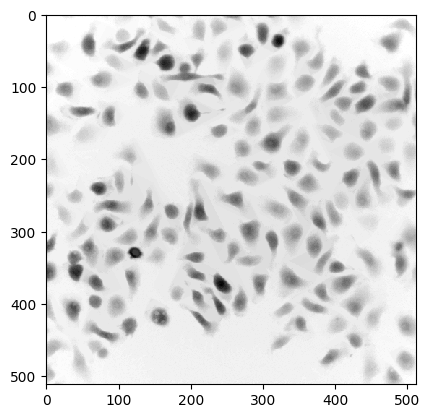

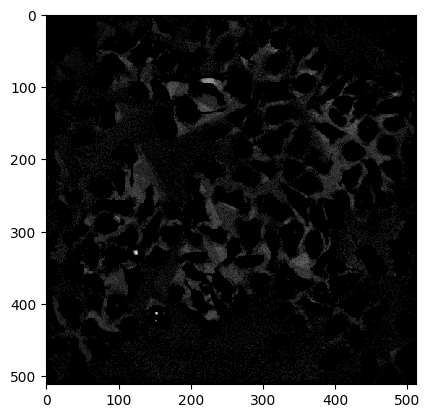

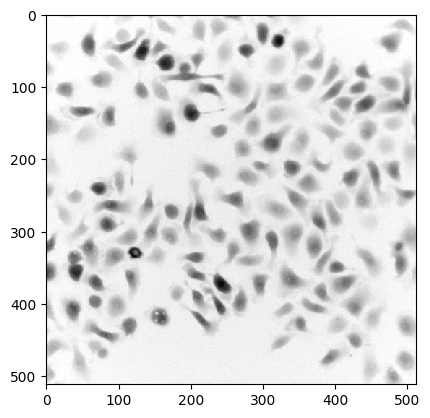

In [23]:
### this is from a trial



# img = 1 - gray_image_dip
# lines = dip.PathOpening(img, length=600, mode={'constrained'})
# lines.Show()

# text = img - lines
# text = dip.AreaOpening(text, filterSize=2)
# text.Show()

# lines = lines > 0.5
# text = text > 0.5
# lines -= dip.BinaryPropagation(text, lines, connectivity=-1, iterations=3)
# img[lines] = 0

# img.Show()

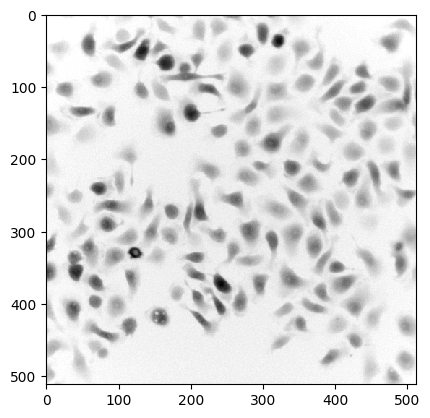

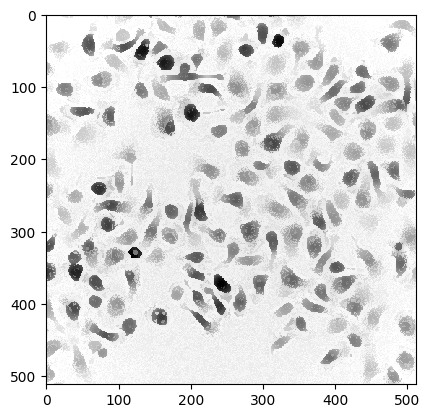

  |                  Center |       Size |  Perimeter | 
- | ----------------------- | ---------- | ---------- | 
  |       dim0 |       dim1 |            |            | 
  |       (px) |       (px) |      (px²) |       (px) | 
- | ---------- | ---------- | ---------- | ---------- | 



In [25]:
inverted = dip.Invert(gray_image_dip)
inverted.Show()
inverted_cs = dip.MorphologicalSharpening(inverted)
inverted_cs.Show()

threshold_value_check = Label(dip.EdgeObjectsRemove(inverted_cs<100), minSize= 40)
m_b1 = Tool.Measure(threshold_value_check, gray_image_dip, ['Center', 'Size','Perimeter'])
print(m_b1)

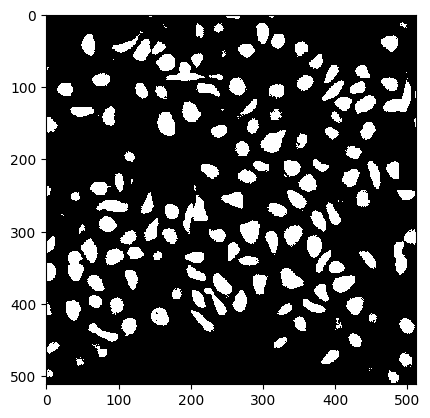

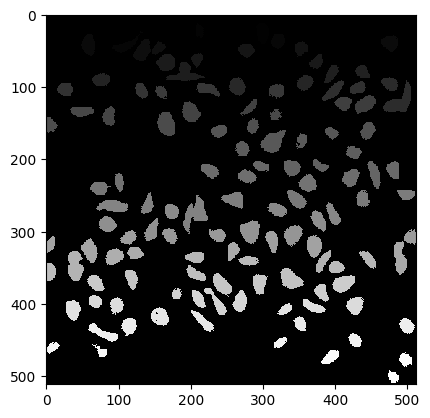

In [50]:
mask_a1 = dip.Threshold(gray_image_dip)[0]
mask_a1 = dip.Dilation(mask_a1,2)
mask_a1.Show()
mask_a1 = dip.AreaOpening(mask_a1, filterSize=150)
mask_a1 = dip.Label(mask_a1)
mask_a1.Show()
# binary_image = dip.BinaryPropagation(gray_image_dip,mask_a1)

In [51]:
m_b2 = Tool.Measure(gray_image_dip, mask_a1, ['Size','Perimeter'])
print(m_b2)

RuntimeError: Data type not supported
in function: dip::Measurement dip::MeasurementTool::Measure(const dip::Image&, const dip::Image&, dip::StringArray, const UnsignedArray&, dip::uint) const (/diplib/src/measurement/measurement_tool.cpp at line number 181)

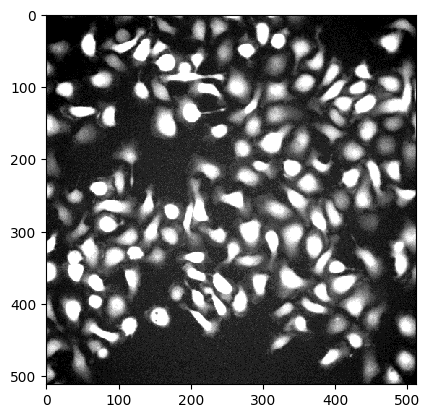

   |                  Center |       Size |  Perimeter | 
-- | ----------------------- | ---------- | ---------- | 
   |       dim0 |       dim1 |            |            | 
   |       (px) |       (px) |      (px²) |       (px) | 
-- | ---------- | ---------- | ---------- | ---------- | 
 1 |      234.9 |      259.2 |  3.605e+04 |      4.457 | 
 2 |      245.3 |      292.7 |  6.466e+04 |      13.12 | 
 3 |      259.2 |      265.5 |  2.254e+04 |      22.70 | 
 4 |      269.3 |      256.8 |  2.709e+04 |      8.865 | 
 5 |      274.7 |      252.8 |  1.612e+04 |      3.142 | 
 6 |      274.7 |      247.2 |  1.167e+04 |      3.142 | 
 7 |      273.0 |      245.2 |      4958. |      22.03 | 
 8 |      274.4 |      241.6 |      8521. |      8.195 | 
 9 |      277.6 |      239.7 |      3792. |      3.142 | 
10 |      273.3 |      247.7 |      6791. |      3.142 | 
11 |      272.4 |      249.0 |      5890. |      3.142 | 
12 |      271.8 |      247.0 |      2675. |      3.142 | 
13 |      274.

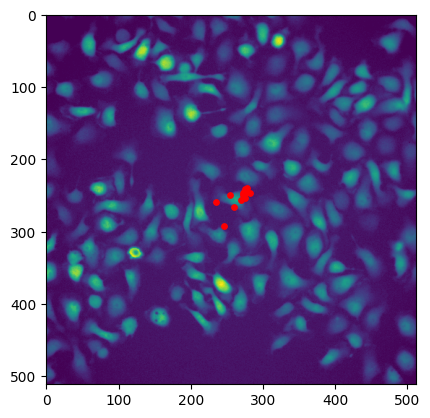

In [ ]:
multi_threshold_image = dip.MultipleThresholds(gray_image_dip, [x for x in range(1000,16000,1000)])
multi_threshold_image.Show()

m_b2 = Tool.Measure(multi_threshold_image, gray_image_dip, ['Center', 'Size','Perimeter'])
print(m_b2)

implot = plt.imshow(gray_image_dip)
x_values = [m_b2['Center'][i][0] for i in range(1,16)]
y_values = [m_b2['Center'][i][1] for i in range(1,16)]
plt.scatter(x_values,y_values, c='r', s=15)
plt.show()

In [ ]:
vol_threshold = dip.VolumeThreshold(inverted_cs, gray_image_dip,0.5)
vol_threshold.Show()

m_b3 = Tool.Measure(vol_threshold, gray_image_dip, ['Center', 'Size','Perimeter'])
print(m_b3)

# implot = plt.imshow(gray_image_dip)
# x_values = [m_b2['Center'][i][0] for i in range(1,16)]
# y_values = [m_b2['Center'][i][1] for i in range(1,16)]
# plt.scatter(x_values,y_values, c='r', s=15)
# plt.show()

RuntimeError: Mask image not binary
in function: bool dip::Image::CheckIsMask(const UnsignedArray&, dip::Option::AllowSingletonExpansion, dip::Option::ThrowException) const (/diplib/src/library/image.cpp at line number 187)
in function: void dip::{anonymous}::ProjectionScan(const dip::Image&, const dip::Image&, dip::Image&, dip::DataType, dip::BooleanArray, dip::{anonymous}::ProjectionScanFunction&) (/diplib/src/statistics/projection.cpp at line number 79)
in function: dip::dfloat dip::VolumeThreshold(const dip::Image&, const dip::Image&, dip::Image&, dip::dfloat) (/diplib/src/segmentation/threshold.cpp at line number 142)

In [ ]:
hist_a1 = dip.Histogram(a_1,nBins=256)
print(hist_a1)
otsu_threshold = dip.OtsuThreshold(inverted_cs, hist_a1)
otsu_threshold.Show()

3D histogram:
    dimension 0: 256 bins, lower bound: -0.5, upper bound: 255.5, bin size: 1
    dimension 1: 256 bins, lower bound: -0.5, upper bound: 255.5, bin size: 1
    dimension 2: 256 bins, lower bound: -0.5, upper bound: 255.5, bin size: 1



TypeError: OtsuThreshold(): incompatible function arguments. The following argument types are supported:
    1. (in: diplib.PyDIP_bin.Image, mask: diplib.PyDIP_bin.Image = <Empty image>) -> diplib.PyDIP_bin.Image
    2. (in: diplib.PyDIP_bin.Image, mask: diplib.PyDIP_bin.Image = <Empty image>, *, out: diplib.PyDIP_bin.Image) -> float
    3. (in: diplib.PyDIP_bin.Histogram) -> float

Invoked with: <Scalar image, DFLOAT, sizes {512, 512}>, <Histogram, sizes {256, 256, 256}>